In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time # delay within program
from math import *
import random
import pickle
import os

import nidaqmx # laser output
from pyueye import ueye
from pypyueye import Camera

from improc import *

ModuleNotFoundError: No module named 'pyueye'

# Inits and checks

In [2]:
templates,bodies = load_templates()
cam,task = init_instruments()

In [18]:
bgs = make_vec_bg(cam,task,[0,1],total_time=20)

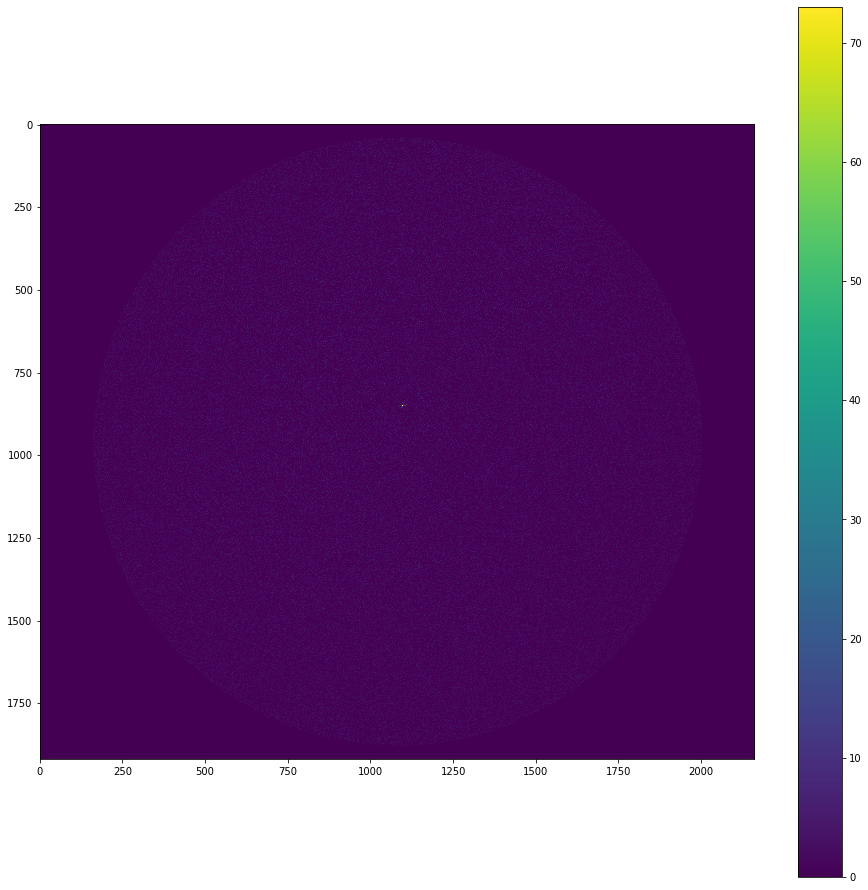

In [21]:
# Check that things are working
plt.figure(figsize=(16,16))
img = grab_im(cam,bgs[0])
plt.imshow(img)
plt.colorbar();

[{'loc': array([1096.        ,  851.26315789]), 'img': array([[1, 0, 0, ..., 0, 1, 0],
       [0, 1, 3, ..., 0, 2, 0],
       [1, 0, 0, ..., 0, 3, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 4],
       [2, 0, 0, ..., 0, 1, 2],
       [1, 0, 0, ..., 1, 1, 0]], dtype=uint8), 'scores': array([382260, 321787]), 'angs': array([270,   0]), 'endpts': array([[1094, 1107],
       [ 856,  850]]), 'body': 210.0}]


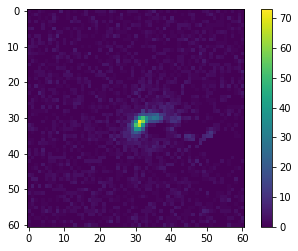

In [22]:
worms = find_worms(img,templates,bodies)
print(worms)
plt.imshow(worms[0]['img'])
plt.colorbar();

# AIY test

In [6]:
track,angs,lights = if_stmt_angle(0,cam,task,bgs,templates,bodies,total_time=600)

Finding orientation
elapsed 9

1
	 612.74 -1082.24
	body 255.0 head 255 light 0
2
	 613.13 -1082.24
	body 255.0 head 255 light 0
4
	 612.81 -1082.66
	body 255.0 head 270 light 1
5
	 612.19 -1083.65
	body 225.0 head 240 light 1
6
	 611.17 -1084.49
	body 225.0 head 210 light 0
8
	 611.34 -1084.28
	body 225.0 head 210 light 0
9
	 610.86 -1084.92
	body 225.0 head 210 light 0
		Switched
10
	 610.75 -1084.9
	body 45.0 head 90 light 0
12
	 609.82 -1085.49
	body 45.0 head 90 light 0
		Switched
13
	 610.33 -1085.31
	body 225.0 head 210 light 0
15
	 610.26 -1085.18
	body 225.0 head 210 light 0
16
	 610.35 -1085.27
	body 225.0 head 210 light 0
17
	 610.38 -1085.2
	body 225.0 head 210 light 0
19
	 610.02 -1085.41
	body 225.0 head 210 light 0
		Switched
20
	 609.73 -1085.62
	body 45.0 head 90 light 0
22
	 609.03 -1086.27
	body 45.0 head 75 light 0
23
	 608.67 -1086.32
	body 45.0 head 75 light 0
		Switched
24
	 608.02 -1087.26
	body 225.0 head 240 light 1
26
	 606.38 -1089.9
	body 225.0 head 270 lig

237
	 1126.79 -1204.11
	body 15.0 head 345 light 1
238
	 1131.25 -1204.73
	body 345.0 head 45 light 1
239
	 1135.12 -1204.94
	body 345.0 head 315 light 0
241
	 1138.97 -1205.14
	body 345.0 head 0 light 1
242
	 1143.61 -1205.23
	body 345.0 head 30 light 1
243
	 1148.21 -1205.04
	body 345.0 head 0 light 1
245
	 1153.55 -1204.94
	body 345.0 head 15 light 1
247
	 1158.97 -1204.56
	body 15.0 head 315 light 1
249
	 1166.21 -1204.58
	body 345.0 head 0 light 1
250
	 1170.11 -1204.97
	body 345.0 head 0 light 1
251
	 1174.09 -1205.06
	body 345.0 head 75 light 1
253
	 1178.79 -1204.59
	body 345.0 head 345 light 0
254
	 1183.75 -1204.24
	body 15.0 head 45 light 0
256
	 1187.76 -1203.61
	body 15.0 head 315 light 1
257
	 1192.16 -1203.88
	body 15.0 head 270 light 1
259
	 1195.8 -1204.86
	body 315.0 head 345 light 1
261
	 1198.06 -1206.49
	body 315.0 head 345 light 1
262
	 1200.72 -1208.33
	body 315.0 head 30 light 1
264
	 1204.23 -1210.21
	body 345.0 head 315 light 0
265
	 1207.17 -1211.58
	body 345

471
	 1631.14 -1397.94
	body 15.0 head 345 light 1
473
	 1634.9 -1397.63
	body 345.0 head 90 light 1
474
	 1637.02 -1397.34
	body 15.0 head 345 light 1
476
	 1639.89 -1397.5
	body 15.0 head 285 light 1
477
	 1643.66 -1398.37
	body 15.0 head 0 light 1
479
	 1645.06 -1399.03
	body 330.0 head 285 light 0
480
	 1647.0 -1399.9
	body 345.0 head 0 light 1
481
	 1652.31 -1401.61
	body 345.0 head 45 light 1
483
	 1654.16 -1401.61
	body 15.0 head 345 light 1
484
	 1657.83 -1402.01
	body 15.0 head 330 light 1
485
	 1660.58 -1402.36
	body 345.0 head 0 light 1
487
	 1663.58 -1403.82
	body 345.0 head 0 light 1
488
	 1668.31 -1405.86
	body 345.0 head 90 light 1
490
	 1671.4 -1405.64
	body 345.0 head 0 light 1
491
	 1674.35 -1405.82
	body 30.0 head 270 light 1
493
	 1678.27 -1406.27
	body 30.0 head 30 light 0
494
	 1679.58 -1406.31
	body 345.0 head 0 light 1
496
	 1681.39 -1407.22
	body 345.0 head 315 light 0
497
	 1685.36 -1408.67
	body 345.0 head 45 light 1
498
	 1687.0 -1409.17
	body 345.0 head 90 

No worms found
Didn't find right worm
No worms found
Didn't find right worm
No worms found
Didn't find right worm
No worms found
Didn't find right worm
No worms found
Didn't find right worm
No worms found
Didn't find right worm
No worms found
Didn't find right worm
No worms found
Didn't find right worm
No worms found
Didn't find right worm
No worms found
Didn't find right worm
No worms found
Didn't find right worm
No worms found
Didn't find right worm
No worms found
Didn't find right worm
No worms found
Didn't find right worm
No worms found
Didn't find right worm
No worms found
Didn't find right worm
No worms found
Didn't find right worm
No worms found
Didn't find right worm
No worms found
Didn't find right worm
No worms found
Didn't find right worm
No worms found
Didn't find right worm
No worms found
Didn't find right worm
No worms found
Didn't find right worm
No worms found
Didn't find right worm
No worms found
Didn't find right worm
No worms found
Didn't find right worm
No worms fou

In [8]:
np.save('08_31_track0.npy',track)
np.save('08_31_angles0.npy',angs)
np.save('08_31_lights0.npy',lights)

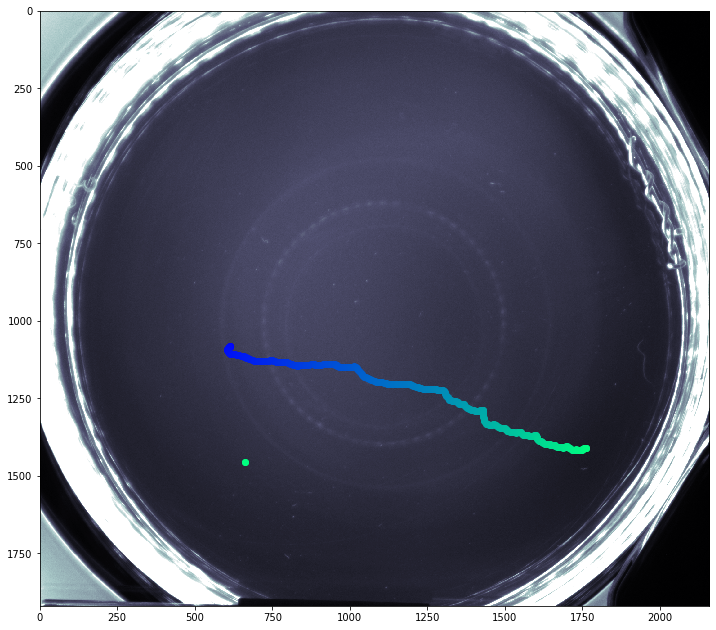

In [9]:
fig,ax = plt.subplots(1)
img = grab_im(cam,None)
ax.imshow(img,cmap='bone')
fig.set_size_inches((12,12))
NPOINTS = track.shape[0]
ax.set_prop_cycle('color',plt.cm.winter(np.linspace(0,1,NPOINTS)))
for i in range(NPOINTS-1):
    ax.scatter(track[i,1],track[i,2])
    ax.set_aspect('equal','box')

# Learning expts

In [7]:
def tabular_Q_agent(direction,light_vec,f_ind,Q_chkpt=None,t_chkpt=0,delay=0,alpha=.05,gamma=0.5,total_time=600,track_time=10,ht_time=3):
    # Fills in a value table theta x light, where light is discretized as in light_vec.
    # delay is how much time in sec between each sample
    # alpha is the learning rate for averaging
    # total_time is in seconds
    # direction is target direction.
    
    # Q_chkpt and t_chkpt are to continue previous trials. Q_chkpt takes the last np array of Q values and 
    # t_chkpt is the approximate last time.
    
    NUM_DEGS = 12 # 12 for 30 degree increments
    
    def get_eps(t, start=1, end=.1, tau=total_time/4):
        # Returns the epsilon value at t given a start eps, end, and time constant
        # For exponential decay:
        return (start-end)*np.exp(-t/tau) + end  
        # For constant (good for initial tests):
        #return .1
    
    
    # Initialization block
    if Q_chkpt is None:
        Q_table = np.random.randn(NUM_DEGS,NUM_DEGS,len(light_vec))  # random init for now
    else:
        Q_table = Q_chkpt
    Q_obs = [[[[] for i in range(2)] for j in range(NUM_DEGS)] for k in range(NUM_DEGS)] # keep track of updates
        # The 24's above are the number of options [-180,180) in increments of 15
    track = []
    bg = bgs[0]    
    START = True
    state_inds = [0,0]
    
    # Find initial head endpoint
    print('Finding orientation')
    head,old_loc = find_ht(cam,bg,templates,bodies,runtime=5)

    # Initialize all timers
    elapsed = Timer(total_time)
    track_el = Timer(track_time)
    ht_el = Timer(ht_time)  
    
    while not elapsed.check(): 
        
        # Collect image and make sure worm exists
        img = grab_im(cam,bg)
        worms = find_worms(img,templates,bodies,ref_pts=[head],num_worms=1)
        
        if worms is None:
            task.write(0)
            bg = bgs[0]
            print('Didn\'t find right worm')
            continue
        worm = worms[0]
        head = worm['endpts'][:,0]
        
        
        # Update table block
        # light_ind and state_ind should still be from previous loop
        if START:
            reward = 0
        else:
            reward = proj(worm['loc']-last_loc, [np.cos(direction*pi/180),-np.sin(direction*pi/180)]) # Get reward
            if np.isnan(reward) or np.abs(reward)>10:
                reward = 0
        old_state_inds = state_inds
        last_loc = worm['loc']
        
        # finding state
        body_dir = relative_angle(worm['body'],direction)
        head_body = relative_angle(worm['angs'][0],worm['body'])
        state_inds = [int((body_dir+180)//15), int((head_body+180)//15)]
        
        if not START:
            # Q table update step:
            # Q_t+1 (s,a) <- Q_t(s,a) + alpha([r+gamma*max_a'(Q_t(s',a'))] - Q_t(s,a))
            Q_table[old_state_inds[0],old_state_inds[1],light_ind] = \
                Q_table[old_state_inds[0],old_state_inds[1],light_ind] + \
                alpha*((reward+gamma*np.max(Q_table[state_inds[0],state_inds[1],:])) - \
                       Q_table[old_state_inds[0],old_state_inds[1],light_ind])
            
            Q_obs[old_state_inds[0]][old_state_inds[1]][light_ind].append(reward)

        
        # Light selection and action block
        eps = get_eps(elapsed.t+t_chkpt)
        if np.random.random() < eps or START:
            light_ind = random.choice(range(len(light_vec)))
            light = light_vec[light_ind]
            START = False
        else:
            # Choose greedy action
            light_ind = np.argmax(Q_table[state_inds[0],state_inds[1],:])
            light = light_vec[light_ind]
        task.write(light)
        bg = bgs[light_ind]
        
        
        # Tracking block
        if track_el.check():
            track.append(np.hstack([elapsed.t,worm['loc']]))
            print('Time',int(elapsed.t)+t_chkpt,'\tang:',int(worm['body']),'loc:',worm['loc'])
            print('\tReward:',round(reward,3))
            with open('Qtab_running'+f_ind+'.json','wb') as f:
                pickle.dump(Q_table, f)
            with open('Qobs_running'+f_ind+'.json','wb') as f:
                pickle.dump(Q_obs, f)
            with open('Track_running'+f_ind+'.json','wb') as f:
                pickle.dump(track, f)

        if ht_el.check():
            head,SWITCH = ht_quick(worm,old_loc)
            old_loc = worm['loc']
            if SWITCH:
                print('\t\tSwitched')
        
        # Update maintenance variables and step delay
        elapsed.update()
        track_el.update()
        ht_el.update()
        time.sleep(delay)
    
    task.write(0)
    return np.array(track),Q_table

### 8.31 Trial 1 with hopefully fixed camera. One worm for two hours

In [23]:
Qtab = np.load('Qtab_running831_0c.json',allow_pickle=True)[-1]
track,Qs = tabular_Q_agent(135,[0,1],'831_0d',Q_chkpt=Qtab,t_chkpt=3600,alpha=0.05,total_time=3600)

Finding orientation
elapsed 4

		Switched
		Switched
Time 3610 	ang: 105 loc: [1099.3877551   846.40816327]
	Reward: -0.082
Time 3620 	ang: 285 loc: [1098.62  844.98]
	Reward: 0.088
		Switched
		Switched
		Switched
Time 3631 	ang: 105 loc: [1098.52238806  844.88059701]
	Reward: -0.114
		Switched
Time 3641 	ang: 315 loc: [1096.52380952  843.57142857]
	Reward: 0.189
		Switched
Time 3651 	ang: 120 loc: [1095.14285714  841.80357143]
	Reward: 0.163
		Switched
		Switched
Time 3662 	ang: 120 loc: [1097.07954545  843.15909091]
	Reward: -0.152
Time 3672 	ang: 285 loc: [1097.74  842.56]
	Reward: 0.449
		Switched
		Switched
Time 3682 	ang: 255 loc: [1099.72121212  839.66060606]
	Reward: 0.027
		Switched
		Switched
Time 3693 	ang: 285 loc: [1099.95934959  842.87804878]
	Reward: -0.158
		Switched
Time 3703 	ang: 30 loc: [1108.61589404  838.89403974]
	Reward: -0.028
Time 3713 	ang: 345 loc: [1114.55102041  836.7414966 ]
	Reward: -0.188
Time 3724 	ang: 45 loc: [1121.81528662  832.70063694]
	Reward: -

		Switched
Time 4720 	ang: 225 loc: [997.67357513 712.88601036]
	Reward: -0.251
		Switched
Time 4730 	ang: 60 loc: [998.37297297 712.49189189]
	Reward: 0.092
Time 4741 	ang: 30 loc: [1001.58549223  710.4611399 ]
	Reward: -0.201
Time 4751 	ang: 30 loc: [1001.19318182  710.00568182]
	Reward: -0.017
		Switched
Time 4761 	ang: 210 loc: [996.22413793 713.22413793]
	Reward: 0.208
		Switched
Time 4772 	ang: 15 loc: [999.34594595 712.78378378]
	Reward: -0.096
Time 4782 	ang: 15 loc: [1008.61538462  710.36263736]
	Reward: -0.46
		Switched
Time 4792 	ang: 165 loc: [1009.87951807  709.62650602]
	Reward: -0.208
		Switched
Time 4803 	ang: 75 loc: [1013.13043478  703.44720497]
	Reward: -0.023
Time 4813 	ang: 45 loc: [1019.68333333  694.67777778]
	Reward: 0.089
Time 4824 	ang: 15 loc: [1028.02941176  689.55294118]
	Reward: 0.143
Time 4834 	ang: 60 loc: [1036.48369565  678.36956522]
	Reward: 0.115
Time 4844 	ang: 45 loc: [1046.85955056  667.7752809 ]
	Reward: -0.14
Time 4855 	ang: 75 loc: [1059.071856

		Switched
		Switched
Time 5868 	ang: 135 loc: [1354.40131579  638.94078947]
	Reward: 0.33
		Switched
Time 5878 	ang: 315 loc: [1354.53947368  639.03947368]
	Reward: -0.049
		Switched
		Switched
		Switched
Time 5888 	ang: 135 loc: [1355.01265823  639.42405063]
	Reward: 0.39
		Switched
Time 5899 	ang: 315 loc: [1355.19186047  640.06395349]
	Reward: -0.193
		Switched
		Switched
Time 5909 	ang: 315 loc: [1355.50299401  640.24550898]
	Reward: -0.144
		Switched
		Switched
Time 5919 	ang: 315 loc: [1355.9005848   640.59064327]
	Reward: -0.057
		Switched
		Switched
Time 5930 	ang: 315 loc: [1356.04188482  641.04712042]
	Reward: -0.014
		Switched
		Switched
Time 5940 	ang: 315 loc: [1356.57142857  641.50857143]
	Reward: -0.178
		Switched
		Switched
Time 5950 	ang: 315 loc: [1356.77380952  641.9702381 ]
	Reward: -0.389
		Switched
		Switched
Time 5961 	ang: 315 loc: [1357.69273743  642.82681564]
	Reward: 0.27
		Switched
Time 5971 	ang: 135 loc: [1358.93684211  643.52105263]
	Reward: -0.113
		Swi

		Switched
		Switched
Time 6996 	ang: 300 loc: [1325.12650602  595.03012048]
	Reward: 0.262
		Switched
Time 7007 	ang: 120 loc: [1325.32926829  595.29268293]
	Reward: -0.529
		Switched
Time 7017 	ang: 300 loc: [1325.10909091  594.82424242]
	Reward: -0.101
		Switched
		Switched
		Switched
Time 7027 	ang: 300 loc: [1325.22222222  594.97530864]
	Reward: 0.181
Time 7038 	ang: 285 loc: [1326.47305389  597.26347305]
	Reward: -0.022
Time 7048 	ang: 285 loc: [1326.64596273  597.47204969]
	Reward: 0.19
		Switched
		Switched
Time 7058 	ang: 285 loc: [1326.85625  597.575  ]
	Reward: -0.109
		Switched
		Switched
Time 7069 	ang: 345 loc: [1327.04093567  598.06432749]
	Reward: 0.122
		Switched
		Switched
Time 7079 	ang: 345 loc: [1327.23668639  598.50295858]
	Reward: -0.332
		Switched
Time 7089 	ang: 105 loc: [1327.00609756  598.08536585]
	Reward: 0.018
		Switched
		Switched
Time 7100 	ang: 105 loc: [1326.68322981  597.49689441]
	Reward: 0.224
		Switched
Time 7110 	ang: 285 loc: [1327.13333333  598.

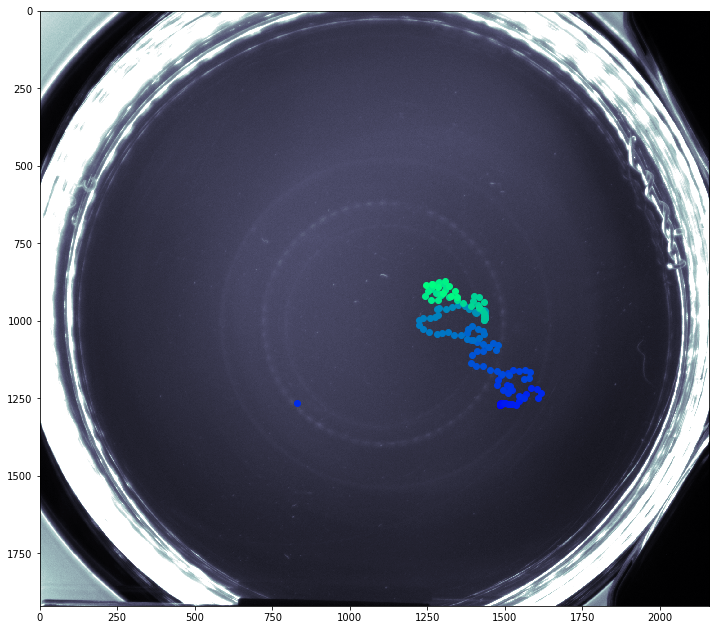

In [17]:
# Hour one
fig,ax = plt.subplots(1)
img = grab_im(cam,None)
ax.imshow(img,cmap='bone')
fig.set_size_inches((12,12))
NPOINTS = track.shape[0]
ax.set_prop_cycle('color',plt.cm.winter(np.linspace(0,1,NPOINTS)))
for i in range(NPOINTS-1):
    ax.scatter(track[i,1],track[i,2])
    ax.set_aspect('equal','box')

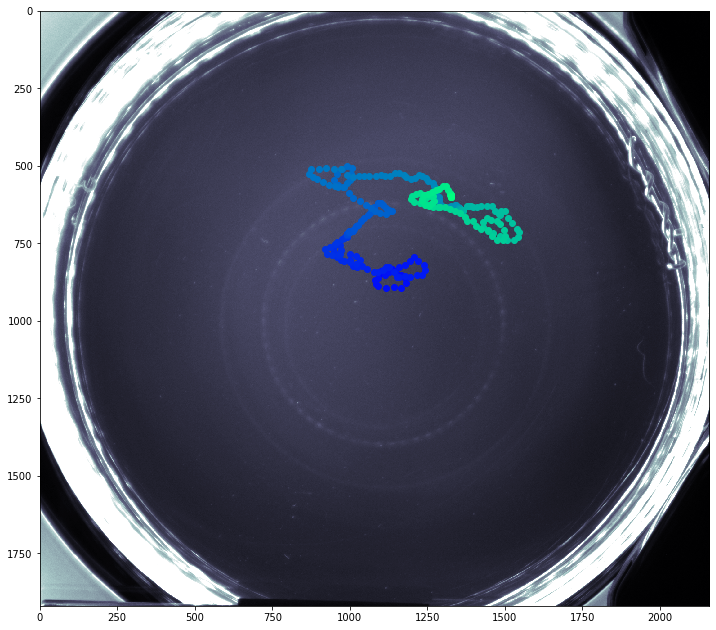

In [24]:
# Hour two
fig,ax = plt.subplots(1)
img = grab_im(cam,None)
ax.imshow(img,cmap='bone')
fig.set_size_inches((12,12))
NPOINTS = track.shape[0]
ax.set_prop_cycle('color',plt.cm.winter(np.linspace(0,1,NPOINTS)))
for i in range(NPOINTS-1):
    ax.scatter(track[i,1],track[i,2])
    ax.set_aspect('equal','box')